In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [45]:
#import CSV file
vox2U_meta = pd.read_csv('vox2Updated.csv')

In [26]:
vox2U_meta.dtypes

Name           object
VoxCeleb2ID    object
VGGFace2       object
Gender         object
Set            object
Ethnicity      object
Birthdate      object
ErrorLinks     object
dtype: object

In [46]:
vox2U_meta[['Name', 'VoxCeleb2ID','VGGFace2','Gender','Set','Ethnicity']] = vox2U_meta[['Name', 'VoxCeleb2ID','VGGFace2','Gender','Set','Ethnicity']].astype('string')
vox2U_meta['Birthdate'] = pd.to_datetime(vox2U_meta['Birthdate'],format = '%Y-%m-%d') 
vox2U_meta.dtypes

Name                   string
VoxCeleb2ID            string
VGGFace2               string
Gender                 string
Set                    string
Ethnicity              string
Birthdate      datetime64[ns]
ErrorLinks             object
dtype: object

In [47]:
# Function that returns the age of the person today
def age(birthdate):
    today = dt.date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age


In [48]:
# Function that can classify a value into a date bucket
def my_func(x):
    if x >= 65 and x < 110:
        return '65 and older'
    elif x >= 55 and x < 65:
        return '55-64'
    elif x >= 45 and x < 55:
        return '45-54'
    elif x >= 35 and x < 45:
        return '35-44'
    elif x >= 25 and x < 35:
        return '25-34'
    elif x >= 18 and x < 25:
        return '18-24'
    elif x < 18:
        return 'Below 18'
    else:
        return 'Age bucket unknown'

In [49]:
vox2U_meta['Age'] = vox2U_meta['Birthdate'].apply(age)

In [50]:
vox2U_meta['Age Bucket'] = vox2U_meta['Age'].apply(my_func)

In [43]:
vox2U_meta

,Name,VoxCeleb2ID,VGGFace2,Gender,Set,Ethnicity,Birthdate,ErrorLinks,Age,Age Bucket
0,Aaron_Ashmore,id00012,n000012,m,dev,Caucasian Latin,1979-10-07,NaN,43,35-44
1,Aaron_Motsoaledi,id00015,n000015,m,dev,African American,1958-08-07,NaN,64,55-64
2,Aaron_Ramsey,id00016,n000016,m,dev,Caucasian Latin,1990-12-26,NaN,32,25-34
3,Aaron_Rodgers,id00017,n000017,m,test,Caucasian Latin,1983-12-02,NaN,39,35-44
4,Aaron_Schock,id00018,n000018,m,dev,Caucasian Latin,1981-05-28,NaN,41,35-44
...,...,...,...,...,...,...,...,...,...,...
6109,Łukasz_Fabiański,id09263,n009263,m,dev,Caucasian Latin,1985-04-18,NaN,37,35-44
6110,Šarūnas_Jasikevičius,id09268,n009268,m,dev,Caucasian Latin,1976-03-05,NaN,46,45-54
6111,Štefan_Füle,id09269,n009269,m,dev,Caucasian Latin,1962-05-24,NaN,60,55-64
6112,Željko_Obradović,id09271,n009271,m,dev,Caucasian Latin,1960-03-09,NaN,62,55-64


In [51]:
#group Age Bucket categories to count
age_buckets = vox2U_meta.groupby(by='Age Bucket').count()['Name']
age_buckets

Age Bucket
18-24                    4
25-34                  544
35-44                 1666
45-54                 1261
55-64                  985
65 and older          1147
Age bucket unknown     507
Name: Name, dtype: int64

In [58]:
#un_age_bucket to find unique age bucket categories
un_age_bucket = sorted(vox2U_meta['Age Bucket'].unique())

#count_age_bucket to save the count as an array
count_age_bucket= np.array(age_buckets)

#perc_age_bucket to find the percentages of each category
total_e = vox2U_meta['Age Bucket'].count()
perc_age_bucket = []

for i in un_age_bucket:
    perc_age_bucket.append(round((age_buckets[i]/total_e*100),2))

#create a data frame with the ethinicity, count and percentage
data_age_bucket = {'Age Bucket': un_age_bucket, 'Count':count_age_bucket, 'Percentage':perc_age_bucket}

df_age_bucket = pd.DataFrame(data_age_bucket)
df_age_bucket


,Age Bucket,Count,Percentage
0,18-24,4,0.07
1,25-34,544,8.90
2,35-44,1666,27.25
3,45-54,1261,20.62
4,55-64,985,16.11
5,65 and older,1147,18.76
6,Age bucket unknown,507,8.29


([<matplotlib.patches.Wedge at 0x259a14f68b0>,
 [Text(1.0999976765603428, 0.002260876345104254, '18-24'),
  Text(1.056048247387567, 0.3078345321591592, '25-34'),
  Text(0.16610193645370086, 1.0873868431732705, '35-44'),
  Text(-1.0738746134348094, 0.238313479728359, '45-54'),
  Text(-0.652584828886145, -0.8855128689678321, '55-64'),
  Text(0.48873417494340676, -0.9854638026038235, '65 and older'),
  Text(1.0628832596852584, -0.2833358012691645, 'Age bucket unknown')],
 [Text(0.5999987326692777, 0.0012332052791477748, '0.07'),
  Text(0.5760263167568546, 0.16790974481408683, '8.90'),
  Text(0.09060105624747318, 0.5931200962763293, '27.25'),
  Text(-0.5857497891462595, 0.1299891707609231, '20.62'),
  Text(-0.35595536121062454, -0.48300701943699925, '16.11'),
  Text(0.2665822772418582, -0.5375257105111764, '18.76'),
  Text(0.5797545052828682, -0.15454680069227156, '8.29')])

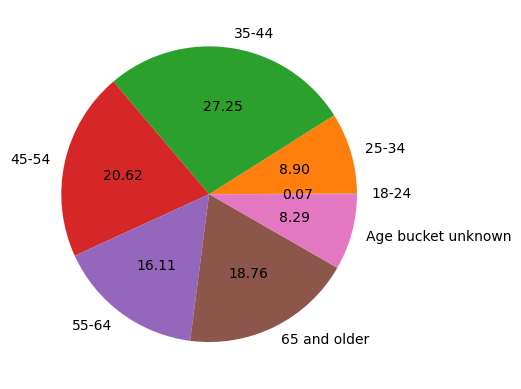

In [59]:
#Pie chart plot of the information
plt.pie(df_age_bucket['Count'], labels = df_age_bucket['Age Bucket'],autopct= '%.2f')